# Data C182 Final Project

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
# IMPORTANT: change to your own root folder path! This dir should contain the contents of:
# https://github.com/datac182fa24/final_proj_faulty_commit_student
root_folder = "/content/drive/MyDrive/Senior Year/Fall 2024/DATA C182/finalproj"
import os
os.chdir(root_folder)
# validate that we're in the right directory (ls should show files like: train.py, README.md, etc)
!pwd
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Senior Year/Fall 2024/DATA C182/finalproj
consts.py   evaluation		 modeling     requirements.txt	tools	      train.py
data	    final_project.ipynb  __pycache__  submission	trainer       utils
dataloader  misc		 README.md    tests		train_pt5.py


In [3]:
# Important: enable autoreload so that changes to .py files are auto-imported. For convenience.
#   https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import seaborn
seaborn.set()

from tqdm.notebook import trange, tqdm

import torch


import os


In [4]:
# Initialize submission data structure
# `auto_grader_data`: your notebook will populate this dict with important outputs that the
#   autograder will check.
# IMPORTANT: do not add additional read/write calls to `auto_grader_data` in your own code.
#   Leave the existing provided read/write calls untouched.
#   Violations will be flagged as academic dishonesty.
# WARNING: running this cell will clear the state in `auto_grader_data`. If you run this
#   cell, you'll have to run the rest of the notebook.
from utils.utils import add_entry_to_auto_grader_data
auto_grader_data = {}

# Part 1: Data preprocessing

In this part, you will implement the dataloader and data preprocessors. See the project spec for detailed instructions.

## (1.A) Implement `compute_data_preprocessor()`

In `dataloader/fault_csv_dataset.py`, you will implement the `compute_data_preprocessor()` function. See the project spec for detailed instructions.

Once you've implemented this function correctly, the following cell should succeed:

In [5]:
from tests.dataloader.test_fault_csv_dataset import TestComputeDataPreprocessor

testcase = TestComputeDataPreprocessor()
testcase.test_simple()
print("Passed tests!")

Passed tests!
Passed tests!


## (1.B) Implement `FaultCSVDataset`.

Once you've correctly implemented this, the following test case should succeed:

In [6]:
from tests.dataloader.test_fault_csv_dataset import TestFaultCsvDataset

testcase = TestFaultCsvDataset()
testcase.test_simple()
print("Passed tests!")

Passed tests!


## (1.C) Benchmark your Dataloader

We will benchmark your dataloader. To receive full credit, you must achieve a throughput of at least `5000 rows/sec`. The below cell should output something like:
```
features_preproc shape=torch.Size([43505, 1098])
Created FaultCSVDataset (1.4087190628051758 secs)
benchmark_stats: {'throughput_rows_per_sec': 33911.9315827453, 'total_time_secs': 0.11795258522033691, 'latency_secs_avg': 0.00011732101440429687, 'latency_secs_std': 3.2681162353353425e-05}
[1/10877] row_dict={'features': tensor([[-0.3203,  0.0000, -0.0354,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0349,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0356,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0348,  ...,  0.0000,  0.0000,  0.0000]]), 'label': tensor([0, 0, 0, 0])}
[2/10877] row_dict={'features': tensor([[ 3.1216,  0.0000, -0.0101,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0354,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0351,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0353,  ...,  0.0000,  0.0000,  0.0000]]), 'label': tensor([0, 0, 0, 0])}
[3/10877] row_dict={'features': tensor([[-0.3203,  0.0000, -0.0348,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0351,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0354,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0353,  ...,  0.0000,  0.0000,  0.0000]]), 'label': tensor([0, 0, 0, 0])}
[4/10877] row_dict={'features': tensor([[-0.3203,  0.0000, -0.0337,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0272,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0233,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0356,  ...,  0.0000,  0.0000,  0.0000]]), 'label': tensor([0, 0, 0, 0])}
Your dataloader throughput was: 33911.9315827453
Is larger than 5000 rows/sec? True
```

In [7]:
from tools.benchmark_dataloader import main_benchmark_dataloader
benchmark_stats_pt1c = main_benchmark_dataloader()
print(f"Your dataloader throughput was: {benchmark_stats_pt1c['throughput_rows_per_sec']}")
print(f"Is larger than 5000 rows/sec? {benchmark_stats_pt1c['throughput_rows_per_sec'] >= 5000}")
add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_1_c", "dataloader_throughput_rows_per_sec"], benchmark_stats_pt1c["throughput_rows_per_sec"])

Created FaultCSVDataset (0.852668046951294 secs)
benchmark_stats: {'throughput_rows_per_sec': 42890.92954289805, 'total_time_secs': 0.09325981140136719, 'latency_secs_avg': 9.272003173828125e-05, 'latency_secs_std': 1.462613005373161e-05}
[1/10877] row_dict={'features': tensor([[-0.3203,  0.0000, -0.0356,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0356,  ...,  0.0000,  0.0000,  0.0000],
        [ 3.1216,  0.0000, -0.0356,  ...,  0.0000,  0.0000,  0.0000],
        [ 3.1216,  0.0000, -0.0356,  ...,  0.0000,  0.0000,  0.0000]]), 'label': tensor([0., 0., 0., 1.])}
[2/10877] row_dict={'features': tensor([[-0.3203,  0.0000, -0.0356,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3203,  0.0000, -0.0356,  ...,  0.0000,  0.0000,  0.0000],
        [ 3.1216,  0.0000,  1.4703,  ...,  0.0000,  0.0000,  0.0000],
        [ 3.1216,  0.0000,  1.4703,  ...,  0.0000,  0.0000,  0.0000]]), 'label': tensor([0., 0., 1., 0.])}
[3/10877] row_dict={'features': tensor([[-0.3203,  0.0000, -0.0

# Part 2: Modeling
In this section, you will train several models on the training dataset, using the dataloader you've implemented.

All models will implement the `FaultyCommitClassifierModel` interface (modeling.model_interface.py)

## (2.A) SingleLayerNN
As a warmup, implement the `SingleLayerNN` class (modeling/single_layer_nn.py). This is essentially implementing logistic regression as a NN. Read the class documentation for more information.

If you've implemented it correctly, the following test should pass:

In [8]:
from tests.modeling.test_single_layer_nn import TestSingleLayerNN

testcase = TestSingleLayerNN()
testcase.test_simple()
print("Test passed!")

Test passed!


## (2.B) Implement `ClassificationTrainer`
Next, implement the `ClassificationTrainer` (in: trainer/trainer.py). Notably, this class contains the training loop, which you will implement.

Tip: feel free to use the training loops from previous homework assignments as reference.

## (2.C) Train a SingleLayerNN
To demonstrate that your dataloader + train loop is working correctly, you will run the `train_and_eval()` function (in train.py). Run the following cell, it should output something like:
```
Train Epoch=4/5 Batch=0/170 loss=0.1745077669620514 train_accuracy=0.9453125 train_accuracy_pos_class=0.20000001788139343                                     | 0/170 [00:00<?, ?it/s]
GPU max_memory_allocated: 19.313664 MB
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 351.24it/s]
Skipping validation (self.skip_val=True)████████████████████████████████████████████████████████████████████████████████▎                         | 139/170 [00:00<00:00, 357.00it/s]
(val) epoch=5/5: AP=0.00000 (T=1.00000) precision@T=0.00000 recall@T=0.00000 f1@T=0.00000
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.89it/s]
Finished training! 2.652967691421509 secs (total_num_epochs=5)
Skipping test (skip_test=True)
```
To get full credit, your implementation should get a final train loss less than 0.35.

Loaded train dataset from data/split/faulty_commit_dev_train.csv, num_train_rows=43505 dim_input_feats: 1098
Model: 1099 params
Using device=cpu
(pre model.to) GPU max_memory_allocated: 0.0 MB
(post model.to) GPU max_memory_allocated: 0.0 MB


Epoch: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Finished training! 4.303007364273071 secs (total_num_epochs=5)
Skipping test (skip_test=True)
Saving figure to: submission/main_train_pt2c.png


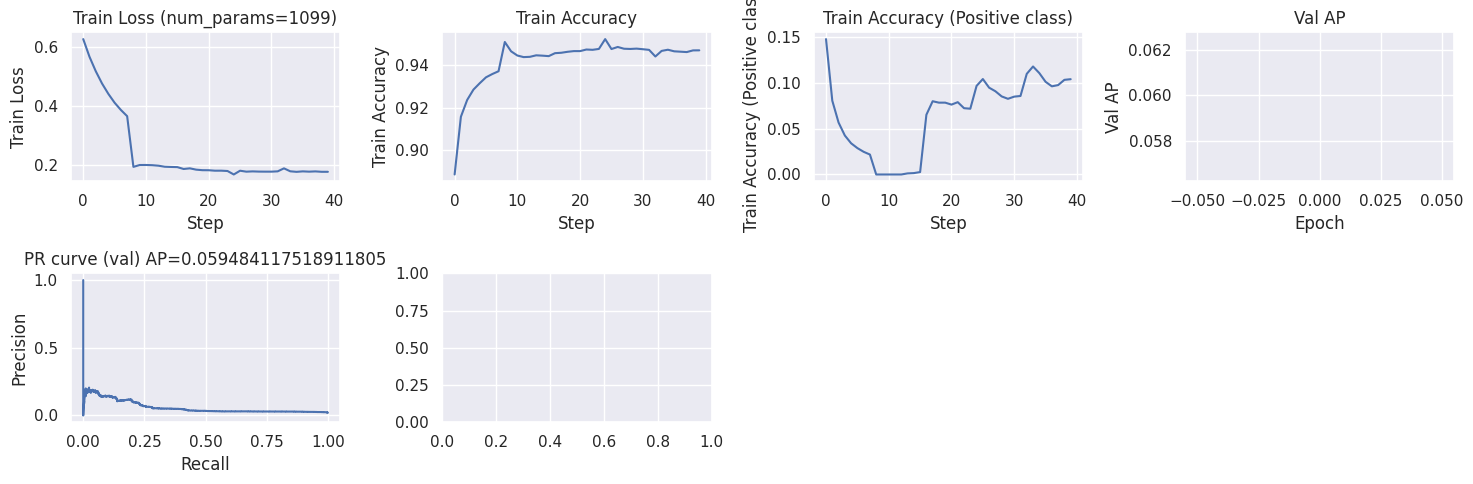

Final train loss: 0.17621697331778705
Is less than 0.35? True


In [9]:
from train import main_train_pt2c

train_meta_pt2c, fig_pt2c = main_train_pt2c()
print(f"Final train loss: {train_meta_pt2c.losses[-1]}")
print(f"Is less than 0.35? {train_meta_pt2c.losses[-1] <= 0.35}")
add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_2_c", "single_layer_nn_train_loss"], train_meta_pt2c.losses[-1])

# Part 3: Offline Evaluation

In this section, you will implement the offline evaluation pipeline for the binary classification task.

## (3.A) Implement `predict_samples()`
Implement the `predict_samples()` function (in: evaluation/offline_eval.py). This function takes a model, generates model predictions on an evaluation dataset, and stores the inference results into a struct `PredictionMetadata`.

To test your implementation, run the following cell:

In [10]:
from tests.evaluation.test_offline_eval import TestPredictSamples

testcase = TestPredictSamples()
testcase.test_batchsize_1()
testcase.test_batchsize_3()
testcase.test_batchsize_4()
print("Tests passed!")

Tests passed!


## (3.B) Implement `compute_eval_metrics()`
Next, implement the `compute_eval_metrics()` function (in: evaluation/offline_eval.py). Given model predictions and ground truth labels (aka the output of `predict_samples()`), this function will calculate the evaluation metrics that we care about.

To test your implementation, run the following cell:

In [11]:
from tests.evaluation.test_offline_eval import TestComputeEvalMetrics
testcase = TestComputeEvalMetrics()
testcase.test_simple()
print("Tests passed!")

Tests passed!


## (3.C) Evaluate trivial baselines
Implement the above three trivial models (`AlwaysPositiveBinaryClassifier`, `AlwaysNegativeBinaryClassifier`, `RandomBinaryClassifier`), and run the corresponding notebook to test your implementations. Your implementation should output something extremely close to:

<details>
<summary> Click me for desired output </summary>
```
Loaded train dataset from data/split/faulty_commit_dev_train.csv, num_train_rows=43505 dim_input_feats: 1098
======== Test metrics (RandomBinaryClassifier) ========
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 804.38it/s]
(Test) AP=0.01344 (T=0.00000) precision@T=0.01363 recall@T=1.00000 f1@T=0.01345
features_preproc shape=torch.Size([43505, 1098])
features_preproc shape=torch.Size([29003, 1098])
features_preproc shape=torch.Size([48337, 1098])
Loaded train dataset from data/split/faulty_commit_dev_train.csv, num_train_rows=43505 dim_input_feats: 1098
======== Test metrics (AlwaysPositiveBinaryClassifier) ========
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 840.09it/s]
(Test) AP=0.01363 (T=1.00000) precision@T=0.01363 recall@T=1.00000 f1@T=0.01345
======== Test metrics (AlwaysNegativeBinaryClassifier) ========
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 811.27it/s]
(Test) AP=0.01363 (T=0.00000) precision@T=0.01363 recall@T=1.00000 f1@T=0.01345
```
</details>


In [12]:
from tools.evaluate_trivial_models import main_evaluate_model_random, main_evaluate_always_pos_neg
test_eval_metrics_pt3c_random = main_evaluate_model_random()
test_eval_metrics_pt3c_always_pos, test_eval_metrics_pt3c_always_neg = main_evaluate_always_pos_neg()
add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_3_c", "random_binary_classifier", "test_eval_metrics"], test_eval_metrics_pt3c_random.to_pydict())
add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_3_c", "always_pos_classifier", "test_eval_metrics"], test_eval_metrics_pt3c_always_pos.to_pydict())
add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_3_c", "always_neg_classifier", "test_eval_metrics"], test_eval_metrics_pt3c_always_neg.to_pydict())

Loaded train dataset from data/split/faulty_commit_dev_train.csv, num_train_rows=43505 dim_input_feats: 1098
======== Test metrics (RandomBinaryClassifier) ========


(Test) AP=0.01363 (T=0.00000) precision@T=0.01363 recall@T=1.00000 f1@T=0.02690
Loaded train dataset from data/split/faulty_commit_dev_train.csv, num_train_rows=43505 dim_input_feats: 1098
======== Test metrics (AlwaysPositiveBinaryClassifier) ========


(Test) AP=0.01363 (T=1.00000) precision@T=0.01363 recall@T=1.00000 f1@T=0.02690
======== Test metrics (AlwaysNegativeBinaryClassifier) ========


(Test) AP=0.01363 (T=0.00000) precision@T=0.01363 recall@T=1.00000 f1@T=0.02690


# Part 4: Train and eval SingleLayerNN
Once (Part 1), (Part 2), (Part 3) are done, let's put all of the parts together and run the full train+eval pipeline! Run the following notebook cells, it will train a `SingleLayerNN` model on the training dataset, measure eval metrics on the validation dataset after each training epoch, and then evaluate on the test set at the end of training. Then, it will generate various plots (eg: train loss over time, eval metrics on val/test sets).

To receive full credit, you should achieve a test AP of greater than 0.015.

If everything is implemented correctly (dataloading, model architecture, and evaluation pipeline), then you should receive something like this:
```
Finished training! 5.5089685916900635 secs (total_num_epochs=10)
======== Validation metrics ========
[epoch=1/10] (val) AP=0.02516 (T=0.50175) precision@T=0.02831 recall@T=0.15529 f1@T=0.02395
[epoch=2/10] (val) AP=0.03529 (T=0.50120) precision@T=0.09592 recall@T=0.08020 f1@T=0.04368
[epoch=3/10] (val) AP=0.03937 (T=0.49581) precision@T=0.10942 recall@T=0.12287 f1@T=0.05788
[epoch=4/10] (val) AP=0.04038 (T=0.49255) precision@T=0.10891 recall@T=0.13140 f1@T=0.05955
[epoch=5/10] (val) AP=0.04056 (T=0.49358) precision@T=0.10866 recall@T=0.12628 f1@T=0.05841
[epoch=6/10] (val) AP=0.04068 (T=0.49561) precision@T=0.10802 recall@T=0.11945 f1@T=0.05673
[epoch=7/10] (val) AP=0.04058 (T=0.47463) precision@T=0.09064 recall@T=0.15700 f1@T=0.05746
[epoch=8/10] (val) AP=0.04123 (T=0.47032) precision@T=0.09427 recall@T=0.16553 f1@T=0.06006
[epoch=9/10] (val) AP=0.04098 (T=0.46488) precision@T=0.09438 recall@T=0.16894 f1@T=0.06055
[epoch=10/10] (val) AP=0.04110 (T=0.46111) precision@T=0.09465 recall@T=0.16894 f1@T=0.06066
======== Test metrics ========
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 176.45it/s]
C:\Users\Eric\teaching\final_proj_faulty_commit_sol\evaluation\offline_eval.py:183: RuntimeWarning: invalid value encountered in divide
  f1s = (precisions * recalls) / (precisions + recalls)
(Test) AP=0.01939 (T=0.51735) precision@T=0.04907 recall@T=0.08801 f1@T=0.03150
Using validation set operating point threshold T=0.4611128866672516:
(Test) (T=0.46111) precision@T=0.02856 recall@T=0.18209 f1@T=0.02469
```

Loaded train dataset from data/split/faulty_commit_dev_train.csv, num_train_rows=43505 dim_input_feats: 1098
Model: 1099 params
Using device=cpu
(pre model.to) GPU max_memory_allocated: 0.0 MB
(post model.to) GPU max_memory_allocated: 0.0 MB


Epoch: 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


Finished training! 7.788198947906494 secs (total_num_epochs=10)
======== Validation metrics ========
[epoch=1/10] (val) AP=0.05754 (T=0.91690) precision@T=0.00000 recall@T=0.00000 f1@T=nan
======== Test metrics ========


(Test) AP=0.02376 (T=2.18093) precision@T=0.00000 recall@T=0.00000 f1@T=nan
Using validation set operating point threshold T=0.9168999791145325:
(Test) (T=0.91742) precision@T=0.05357 recall@T=0.00910 f1@T=0.01556
Saving figure to: submission/main_train_pt4.png
Test AP 0.02376 >= 0.015? True


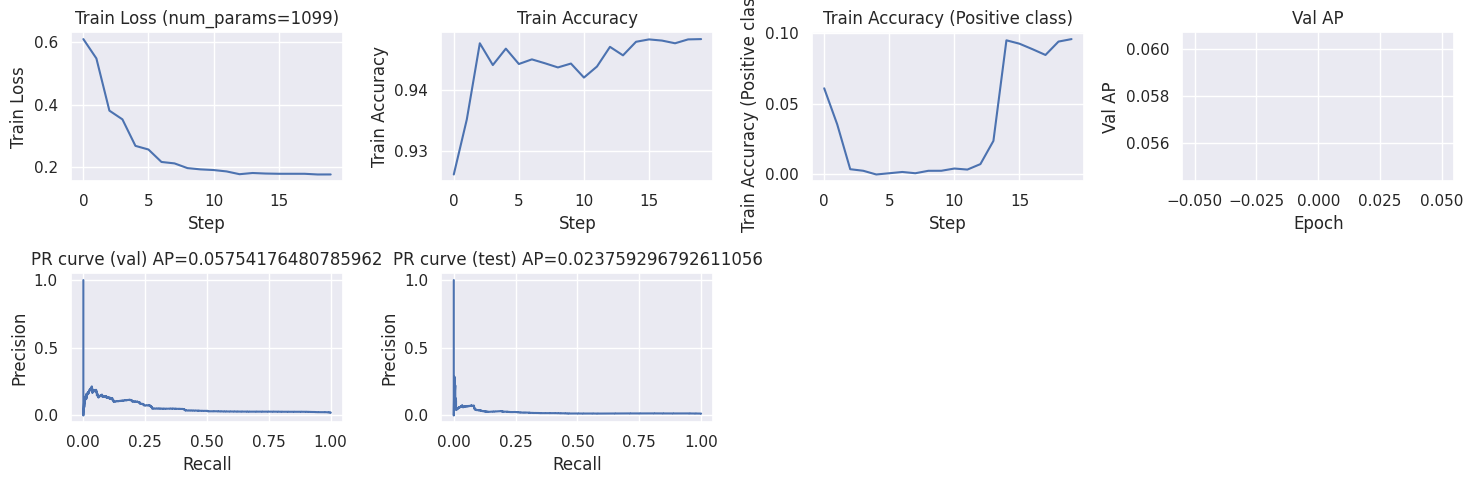

In [13]:
from train import main_train_and_eval_pt4

train_meta_pt4, (test_eval_metrics_pt4, test_metrics_op_pt4), fig_pt4 = main_train_and_eval_pt4()
add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_4_a", "single_layer_nn", "train_meta"], train_meta_pt4.to_pydict())
add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_4_a", "single_layer_nn", "test_eval_metrics"], test_eval_metrics_pt4.to_pydict())
add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_4_a", "single_layer_nn", "test_metrics_op"], test_metrics_op_pt4.to_pydict())
print(f"Test AP {test_eval_metrics_pt4.average_precision:.5f} >= 0.015? {test_eval_metrics_pt4.average_precision >= 0.015}")

# Part 5: Train a better model

Challenge: implement a new model architecture that outperforms the `SingleLayerNN` model you implemented. To achieve full credit, your model must achieve greater than 0.025 test AP.

Tip: implement your model in modeling/, then modify `train_and_eval_pt5()` (in train_pt5.py) to train+eval your new model.

Loaded train dataset from data/split/faulty_commit_dev_train.csv, num_train_rows=43505 dim_input_feats: 1098
Loaded train dataset from data/split/faulty_commit_dev_train.csv, num_train_rows=43505 dim_input_feats: 1098
Model: 322561 params
Using device=cpu
(pre model.to) GPU max_memory_allocated: 0.0 MB
(post model.to) GPU max_memory_allocated: 0.0 MB


Epoch: 100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Finished training! 25.105499267578125 secs (total_num_epochs=10)
======== Validation metrics ========
[epoch=1/10] (val) AP=0.06743 (T=0.33612) precision@T=0.13642 recall@T=0.19113 f1@T=0.15920
======== Test metrics ========


(Test) AP=0.03069 (T=0.52565) precision@T=0.00000 recall@T=0.00000 f1@T=nan
Using validation set operating point threshold T=0.33612266182899475:
(Test) (T=0.33620) precision@T=0.03486 recall@T=0.17906 f1@T=0.05836
Saving figure to: submission/main_train_pt5.png
(my_model) Got test AP: 0.030689153438500587
Greater than 0.025? True


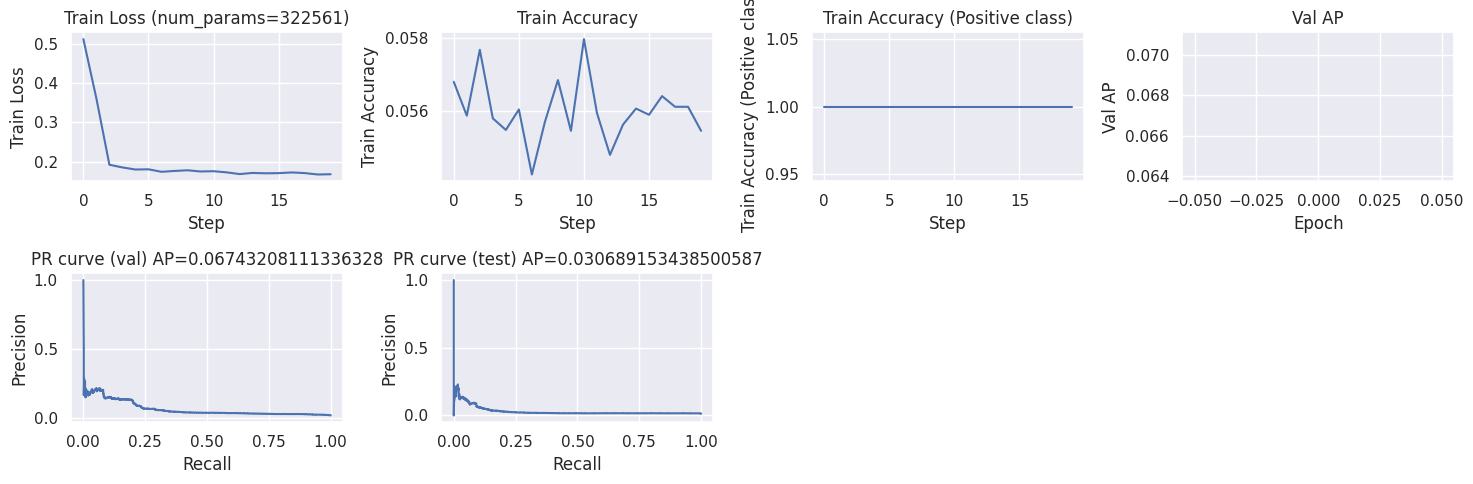

In [23]:
from train_pt5 import train_and_eval_pt5

train_metadata_pt5, (test_eval_metrics_pt5, test_metrics_op_pt5), fig = train_and_eval_pt5()

print(f"(my_model) Got test AP: {test_eval_metrics_pt5.average_precision}")
print(f"Greater than 0.025? {test_eval_metrics_pt5.average_precision >= 0.025}")

add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_5_a", "model_v2", "train_meta"], train_metadata_pt5.to_pydict())
add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_5_a", "model_v2", "test_eval_metrics"], test_eval_metrics_pt5.to_pydict())
add_entry_to_auto_grader_data(auto_grader_data, ["output", "part_5_a", "model_v2", "test_metrics_op"], test_metrics_op_pt5.to_pydict())

# Submission instructions
Run the following cell below to generate + download your submission zip file: datac182_final_proj_submission.zip. You will submit this zip file to Gradescope.

In [ ]:
# IMPORTANT: be sure that `root_folder` is defined correctly in previous cell
from utils.utils import save_auto_grader_data
from consts import STUDENT_SUBMISSION_OUTDIR
import os
outpath_autograder_data = os.path.join(STUDENT_SUBMISSION_OUTDIR, "student_submission_data.pt")
save_auto_grader_data(auto_grader_data, outpath=outpath_autograder_data)
print(f"Saved auto_grader_data to: {outpath_autograder_data}")

os.chdir(root_folder)
!pwd # make sure we are in the right dir
!ls

# Note: It's OK if the `rm` command fails, this is normal if this is your first
#   time running this.
!rm datac182_final_proj_submission.zip
# zip everything (maintain dir structure) but exclude datasets (to keep filesize down)
!zip -r datac182_final_proj_submission.zip . -x "data/*" "__pycache__/*" "*/__pycache__/*" ".git/*"

from google.colab import files
outpath_zip = "datac182_final_proj_submission.zip"
files.download(outpath_zip)
print(f"Finished downloading {outpath_zip}! Upload this zip file to Gradescope as your submission to run the autograder. The {outpath_zip} file will be in your browser's default download directory.")